01/19~01/22
4. breast_cancer 데이터 활용 실습 진행 
=> KNN, Decision Tree, Random Forest 이외에 다른 분류 이용해보거나 조사, 해당 기법들 각각 설명, 결과 설명 등
5. 3, 4에서 만들었던 모델의 성능을 높이는 방법을 각자 희망하는대로 하여 성능을 높이고 그 내용과 코드를 주석과 마크다운을 이용해서 정리하기

모델의 성능을 높이는 방법
1. 각 모델의 매개변수 조정
2. 스케일링
3. 오버샘플링, 언더샘플링

In [2]:
#과연 어디까지 가르쳐야 할까........

## LinearRegression

In [3]:
from sklearn import datasets
housing = datasets.load_boston()

/Users/ohsongmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(housing.data, housing.target, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.770
Accuracy on test set: 0.635


#### LinearRegression의 단점: 조정할 매개변수가 없다. 모델의 성능을 높이기 위해서 다른 방법들이 필요
#### 이때 스케일링을 잠깐 언급 정도는 할 수 있겠지만 한꺼번에 가르치는 것은 받아들이기 어려울 것으로 예상...
#### 그래도 언젠가는 가르칠 가능성이 크니 미리 해보자면..

## 스케일링

피처들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우, 각 피처의 통계적 속성이 동일한 스케일에 있도록 보장하기 위해 진행
1. StandardScaler: 평균이 0, 분산이 1 -> 데이터를 정규분포로 만듬, 이상치의 영향이 유지, 회귀보다 분류에 이용,  최솟값과 최댓값의 크기 제한X, 
2. MinMaxScaler: 데이터를 0-1 사이에 존재하도록 만듬(가장 작은 값이 0, 가장 큰 값이 1), 이상치의 영향이 줄어듬, 분류보다 회귀
3. RobutScaler: 중간값과 사분위값 사용, 이상치의 영향을 최소화한다
4. Normalizer: 각 데이터 사이의 유클리드 거리가 1이 되도록 만듬(반지름이 1인 원의 경계선에 데이터 점을 투영), 일반적인 전처리 X, 데이터의 방향(각도)가 중요한 경우에 사용

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [80]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on training set: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy on training set: 0.770
Accuracy on training set: 0.635


# KNN

매개변수: n_neighbors (이웃의 수)

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
cancer = load_breast_cancer()

In [10]:
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.916


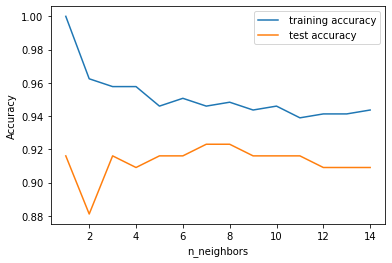

In [18]:
#매개변수 조정 결과를 한번에 보기 위해 시각화
#테스트 정확도가 가장 높을 때 매개변수를 선택

training_accuracy = [] #리스트 생성: 이 코드를 사용할 때 항상 리스트를 초기화하는 것 주의!!
test_accuracy = []

neighbors_settings = range(1, 15) #범위 지정
for n_neighbors in neighbors_settings: #지정한 범위 안에서 아래 코드 반복
    knn = KNeighborsClassifier(n_neighbors = n_neighbors) #매개변수를 바꿈
    knn.fit( X_train, y_train) 
    training_accuracy.append(knn.score( X_train, y_train))  #앞서 만든 리스트에 정확도를 추가
    test_accuracy.append(knn.score( X_test, y_test)) 
    
plt.plot(neighbors_settings, training_accuracy, label =" training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("n_neighbors") 
plt.legend()

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.923


# Decision Tree

매개변수: max_depth(나무의 깊이), min_samples_split(노드를 분할할 때 필요한 최소 샘플 수), min_samples_leaf(리프노드에 있어야하는 최소 샘플 수), max_leaf_nodes(리프노드의 최대 갯수)
#### 과적합을 막기위해 꼭 필요
#### *스케일링 불필요

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.902


In [24]:
tree = DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.916


In [26]:
tree = DecisionTreeClassifier(max_leaf_nodes=7, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.937


훈련 데이터에 대한 정확도는 낮아지지만 테스트 데이터에 대한 정확도는 높아짐
-> 과적합 방지 가능

# Random Forest

#### 각기 다른 트리를 만드는 방법: 1. bootstrapping sample: 샘플 무작위 추출(원본 데이터와 크기는 같지만 내용이 다름, 일부 데이터의 반복 추출 허용) 2. 알고리즘에 사용되는 피처 무작위 선택
매개변수: n_estimators(생성되는 나무 갯수, 많을수록 좋음, 기본값=100), max_features(한 트리에서 선택 가능한 피처 수<-각 트리가 다른 모양을 가지기 위해 필요한 임의성 주입, 작을수록 과적합 가능성이 줄어듬), max_leaf_nodes
#### *마찬가지로 스케일링 불필요

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
forest=RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.944


In [59]:
forest=RandomForestClassifier(max_features=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.944


In [60]:
forest=RandomForestClassifier(max_leaf_nodes=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.944


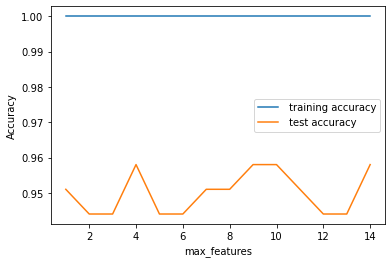

In [61]:
training_accuracy = [] 
test_accuracy = []

features_settings = range(1, 15)
for features in features_settings:
    forest = RandomForestClassifier(max_features = features) 
    forest.fit( X_train, y_train) 
    training_accuracy.append(forest.score( X_train, y_train)) 
    test_accuracy.append(forest.score( X_test, y_test)) 
    
plt.plot(features_settings, training_accuracy, label =" training accuracy") 
plt.plot(features_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("max_features") 
plt.legend()

# Gradient Boosting

매개변수: learning_rate(각 트리가 이전 트리의 실수를 수정하려는 강도, 높을수록 많이 수정, 낮을수록 더 많은 트리 수 필요, 기본값=0.1), max_depth(기본값=3), n_estimators(randomforest는 항상 높을수록 좋았지만 gradientboosting은 모델이 복잡해져 과적합 가능성이 올라간다)
#### *마찬가지로 스케일링 불필요

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.958


In [68]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 0.995
Test set accuracy: 0.944


In [69]:
gbrt = GradientBoostingClassifier(learning_rate=1,random_state=0)
gbrt.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))
#learning_rate는 너무 작거나 너무 크면 성능이 오히려 떨어진다 -> 조정 신중히 

Training set accuracy: 1.000
Test set accuracy: 0.944


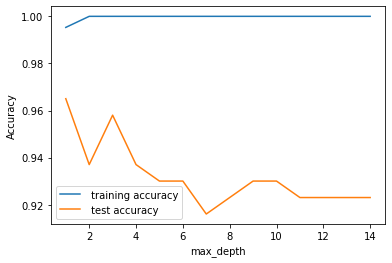

In [77]:
training_accuracy = [] 
test_accuracy = []

depth_settings = range(1, 15)
for depth in depth_settings:
    gbrt = GradientBoostingClassifier(max_depth = depth) 
    gbrt.fit( X_train, y_train) 
    training_accuracy.append(gbrt.score( X_train, y_train)) 
    test_accuracy.append(gbrt.score( X_test, y_test)) 
    
plt.plot(depth_settings, training_accuracy, label =" training accuracy") 
plt.plot(depth_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("max_depth") 
plt.legend()

In [72]:
gbrt = GradientBoostingClassifier(max_depth=1, random_state=0)
gbrt.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 0.995
Test set accuracy: 0.965
